In [70]:
#Example of one output for whole sequence
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Flatten, Dense
from numpy import array
from math import sin
from math import pi, exp
from matplotlib import pyplot
from random import random, randint, uniform

In [57]:
#define model where LSTM is also output layer
model = Sequential()
model.add(LSTM(1, return_sequences=True, input_shape=(3,1)))
model.compile(optimizer='adam', loss='mse')

In [58]:
#input time steps
data = array([0.1, 0.2, 0.3]).reshape((1,3,1))

In [59]:
#make and show prediction
print(model.predict(data))

[[[-0.00247372]
  [-0.00619001]
  [-0.01030241]]]


In [60]:
#create sequence(SINE WAVE)
length = 100
freq = 5
sequence = [sin(2 * pi * freq * i/length) for i in range(length)]

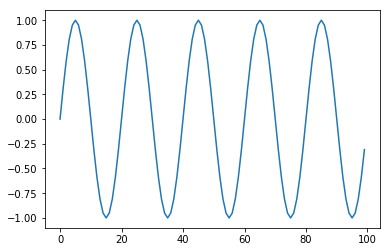

In [61]:
#plot sequence
pyplot.plot(sequence)
pyplot.show()

In [62]:
#create sequence (DAMPED SINE WAVE)
length = 100
period = 10
decay = 0.05
sequence = [0.5 + 0.5*sin(2*pi*i/period)*exp(-decay*i) for i in range(length)]

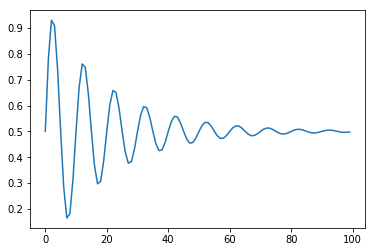

In [63]:
#plot sequence
pyplot.plot(sequence)
pyplot.show()

In [64]:
#generate damped sine wave in [0, 1]
def generate_sequence(length, period, decay):
    return [0.5 + 0.5*sin(2*pi*i/period)*exp(-decay*i) for i in range(length)]

In [65]:
p = randint(10, 20)
d = uniform(0.01, 0.1)

In [66]:
#generate input and output pairs of damnped sine waves
def generate_example(length, n_patterns, output):
    X, y = list(), list()
    for _ in range(n_patterns):
        p = randint(10,20)
        d = uniform(0.01, 0.1)
        sequence = generate_sequence(length + output, p, d)
        X.append(sequence[:-output])
        y.append(sequence[-output:])
    X = array(X).reshape(n_patterns, length, 1)
    y = array(y).reshape(n_patterns, output)
    return X, y

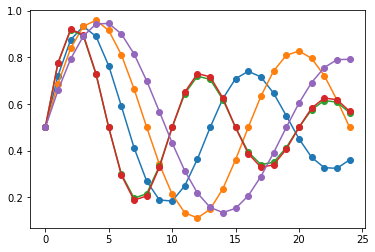

In [67]:
#test problem generation
X, y = generate_example(20, 5, 5)
for i in range(len(X)):
    pyplot.plot([x for x in X[i, :, 0]] + [x for x in y[i]], '-o')
pyplot.show()

In [68]:
#configure problem
length = 50
output = 5

In [71]:
# define model
model = Sequential()
model.add(LSTM(20, return_sequences=True, input_shape=(length, 1)))
model.add(LSTM(20))
model.add(Dense(output))
model.compile(loss='mae', optimizer='adam')
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 50, 20)            1760      
_________________________________________________________________
lstm_7 (LSTM)                (None, 20)                3280      
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 105       
Total params: 5,145
Trainable params: 5,145
Non-trainable params: 0
_________________________________________________________________
None


In [88]:
#fit model
X, y = generate_example(length, 50000, output)
model.fit(X, y, batch_size=1, epochs=1)

Epoch 1/1
50000/50000 [==============================] - 3813s 76ms/step - loss: 0.0066


In [89]:
#evaluate model
X, y = generate_example(length, 1000, output)
loss = model.evaluate(X, y, verbose=0)
print('MAE: %f' % loss)
#0.0075 on 50000 10 bs

MAE: 0.003594


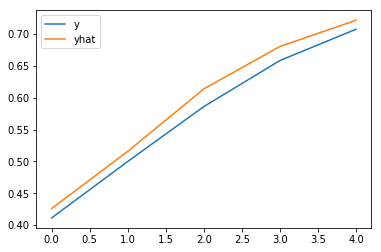

In [99]:
#prediction on new data
X, y = generate_example(length, 1, output)
yhat = model.predict(X, verbose=0)
pyplot.plot(y[0], label='y')
pyplot.plot(yhat[0], label='yhat')
pyplot.legend()
pyplot.show()
